#### Step 1. 데이터 병합하기
- 엑셀에서 데이터 시트별로 다 가져와서 병합하기

In [1]:
import os
import pandas as pd
import numpy as np
os.chdir(r"C:\Users\user\jupyter\python\mini_project\주문서 정리하기")

In [2]:
sheet_names = [str(i+1) + '월' for i in range(12)]
sheet_names

['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

In [3]:
merged_df = pd.DataFrame()
for sn in sheet_names:
    df = pd.read_excel(r"C:\Users\user\jupyter\python\mini_project\주문서 정리하기\월별매출데이터.xlsx", 
                        sheet_name = sn,  skiprows = range(6))
    merged_df = pd.concat([merged_df, df], axis = 0, ignore_index = True)
    

In [4]:
df = merged_df.iloc[:, 1:]
df['일자']
# 날짜 구분이 서로 상이하다. 

0          2018.1.1
1          2018.1.1
2          2018.1.1
3          2018.1.1
4          2018.1.1
            ...    
18224    2018-12-31
18225    2018-12-31
18226    2018-12-31
18227    2018-12-31
18228    2018-12-31
Name: 일자, Length: 18229, dtype: object

#### Step 2. 포맷 통일 및 변수 추가
- 일자 컬럼의 포맷을 통일. 
- 변수 추가: 제품별 가격 정보 파일에서 제품 가격 확인.
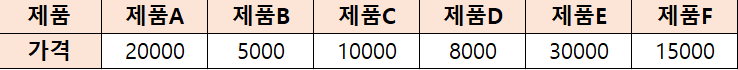

In [5]:
df.head()

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단
0,2018.1.1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹
1,2018.1.1,지점2,제품F,8,C-87,서울특별시 서대문구 신촌동,배송완료,신용카드
2,2018.1.1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제
3,2018.1.1,지점3,제품D,7,C-307,서울특별시 서대문구 냉천동,주문완료,휴대폰결제
4,2018.1.1,지점2,제품E,9,C-342,서울특별시 종로구 묘동,배송완료,인터넷뱅킹


In [6]:
# 포맷 통일
df['일자'] = df['일자'].str.replace('.', '-') # python 내장 함수. 
df['일자']

0          2018-1-1
1          2018-1-1
2          2018-1-1
3          2018-1-1
4          2018-1-1
            ...    
18224    2018-12-31
18225    2018-12-31
18226    2018-12-31
18227    2018-12-31
18228    2018-12-31
Name: 일자, Length: 18229, dtype: object

In [7]:
price_df = pd.read_excel(r"제품별_가격정보-Copy1.xlsx")
price_df = price_df.T # 전치행렬
# 하나의 행이 하나의 정보를 가지도록 해야 한다.
price_df.iloc[1:, 0]

제품A    20000
제품B     5000
제품C    10000
제품D     8000
제품E    30000
제품F    15000
Name: 0, dtype: object

In [8]:
price_dict = price_df.iloc[1:, 0].to_dict() 

In [9]:
df['품명'] ### 여기서 해야할 것은 제품에 맞춰서 각각으로 가격으로 대체하고 싶다.

0        제품B
1        제품F
2        제품B
3        제품D
4        제품E
        ... 
18224    제품F
18225    제품D
18226    제품D
18227    제품B
18228    제품D
Name: 품명, Length: 18229, dtype: object

In [80]:
df['가격'] = df['품명'].replace(price_dict)
# 품명에 맞게 가격을 대응하고 이를 가격 컬럼에 추가해준다.
df

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단,가격,주문 금액,월
0,2018-1-1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹,5000,16500.0,1
1,2018-1-1,지점2,제품F,8,C-87,서울특별시 서대문구 신촌동,배송완료,신용카드,15000,132000.0,1
2,2018-1-1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제,5000,11000.0,1
3,2018-1-1,지점3,제품D,7,C-307,서울특별시 서대문구 냉천동,주문완료,휴대폰결제,8000,61600.0,1
4,2018-1-1,지점2,제품E,9,C-342,서울특별시 종로구 묘동,배송완료,인터넷뱅킹,30000,297000.0,1
...,...,...,...,...,...,...,...,...,...,...,...
18224,2018-12-31,지점1,제품F,6,C-59,서울특별시 성북구 보문동3가,배송중,신용카드,15000,99000.0,12
18225,2018-12-31,지점2,제품D,9,C-287,서울특별시 중구 의주로1가,배송중,인터넷뱅킹,8000,79200.0,12
18226,2018-12-31,지점4,제품D,5,C-175,서울특별시 종로구 명륜1가,주문완료,인터넷뱅킹,8000,44000.0,12
18227,2018-12-31,지점1,제품B,4,C-17,서울특별시 영등포구 양평동3가,주문완료,인터넷뱅킹,5000,22000.0,12


In [11]:
df['주문 금액'] = df['가격']*df['수량']*1.1  # ndarray 브로드캐스팅, 유니버설 함수
df['주문 금액']

0         16500.0
1        132000.0
2         11000.0
3         61600.0
4        297000.0
           ...   
18224     99000.0
18225     79200.0
18226     44000.0
18227     22000.0
18228     35200.0
Name: 주문 금액, Length: 18229, dtype: float64

In [12]:
df.head()

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단,가격,주문 금액
0,2018-1-1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹,5000,16500.0
1,2018-1-1,지점2,제품F,8,C-87,서울특별시 서대문구 신촌동,배송완료,신용카드,15000,132000.0
2,2018-1-1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제,5000,11000.0
3,2018-1-1,지점3,제품D,7,C-307,서울특별시 서대문구 냉천동,주문완료,휴대폰결제,8000,61600.0
4,2018-1-1,지점2,제품E,9,C-342,서울특별시 종로구 묘동,배송완료,인터넷뱅킹,30000,297000.0


#### Step3 월별 매출 추이 파악하기
- 꺾은 선 그래프로 매출 추이 파악해주자. 

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] =(5,5)

In [14]:
df['월'] = df['일자'].str.split('-', expand = True)[1].astype(int)
month_sold =  df.groupby(['월'], as_index = False)['주문 금액'].sum()
month_sold_by_product =  df.groupby(['월', '품명'], as_index = False)['주문 금액'].sum()

month_sold

,월,주문 금액
0,1,114211900.0
1,2,104314100.0
2,3,111015300.0
3,4,122255100.0
4,5,110561000.0
5,6,111010900.0
6,7,115690300.0
7,8,111845800.0
8,9,117189600.0
9,10,117979400.0


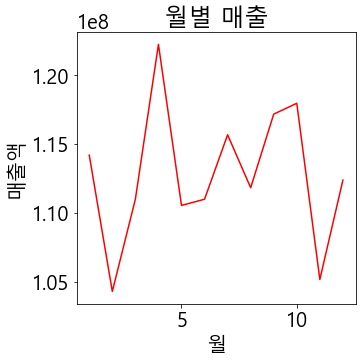

In [85]:
# 월별 매출 확인
plt.title('월별 매출')
plt.xlabel('월')
plt.ylabel('매출액')

plt.plot(month_sold['월'], month_sold['주문 금액'], color = 'r')

In [16]:
product_name = df['품명'].unique()
product_name = sorted(product_name, key = lambda x: x[2])
product_name

['제품A', '제품B', '제품C', '제품D', '제품E', '제품F']

In [17]:
month_sold_by_product

,월,품명,주문 금액
0,1,제품A,7392000.0
1,1,제품B,8283000.0
2,1,제품C,18722000.0
3,1,제품D,23170400.0
4,1,제품E,32010000.0
...,...,...,...
67,12,제품B,6611000.0
68,12,제품C,20350000.0
69,12,제품D,21428000.0
70,12,제품E,29667000.0


In [18]:
month_sold_by_product.loc[month_sold_by_product['품명'] == '제품A']

,월,품명,주문 금액
0,1,제품A,7392000.0
6,2,제품A,7722000.0
12,3,제품A,8756000.0
18,4,제품A,10978000.0
24,5,제품A,9658000.0
30,6,제품A,7920000.0
36,7,제품A,9900000.0
42,8,제품A,10032000.0
48,9,제품A,10208000.0
54,10,제품A,9834000.0


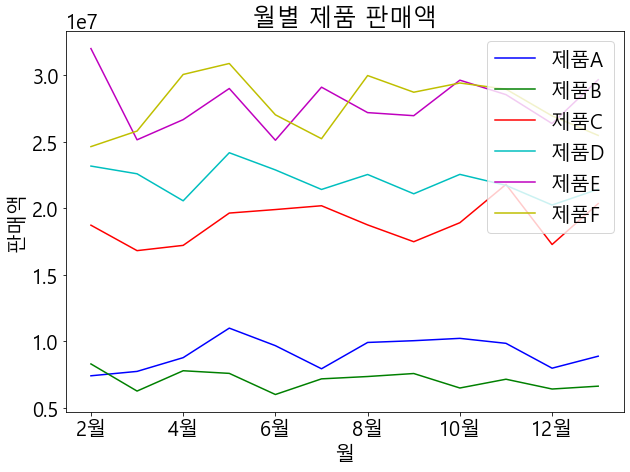

In [88]:
plt.rcParams["figure.figsize"] =(10,7)

# 제품별로 나누어야 하는데, masking???

plt.title('월별 제품 판매액')
plt.xlabel('월')
plt.ylabel('판매액')

# # 월별 매출
# plt.plot(month_sold['월'], month_sold['주문 금액'], label = '주문 금액 합계' ,color = 'k')

# x축 눈금 설정. 
x_ticks = np.arange(1,12,2)
plt.xticks(x_ticks, [str(i+1)+'월' for i in x_ticks] )

# 제품명 설정, 색 리스트 추가
product_name = df['품명'].unique()
product_name = sorted(product_name, key = lambda x: x[2])
product_name
color_list = ['b', 'g', 'r', 'c', 'm', 'y']

for product, color in zip(product_name, color_list):
    con = month_sold_by_product['품명'] == product
    graph_data =  month_sold_by_product.loc[month_sold_by_product['품명'] == product]
    plt.plot(graph_data['월'], graph_data['주문 금액'], label = product, color = color)
plt.legend(loc = 'upper right')

# 굳이 색깔 지정하지 않아도 됨. 

#### Step4. 다양한 조건에 따른 판매 통계 분석
- 제품별 판매량 합계
- 제품과 결제 수단에 따른 히트 맵

In [32]:
df.head()
product_count = df.groupby(['품명'], as_index = False)['수량'].sum()
product_count

,품명,수량
0,제품A,4965
1,제품B,15369
2,제품C,20636
3,제품D,30038
4,제품E,10164
5,제품F,20191


<BarContainer object of 6 artists>

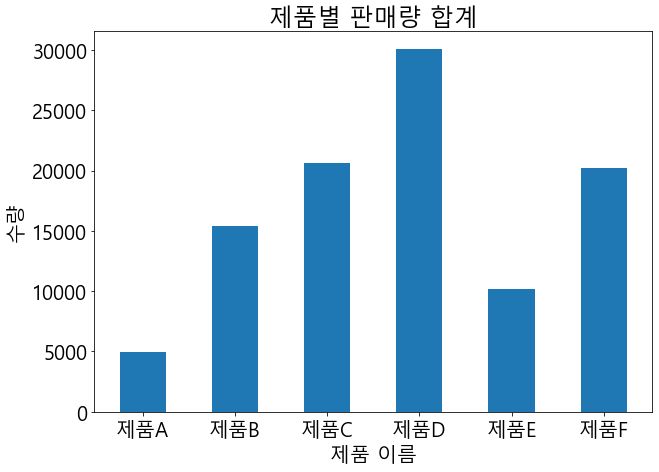

In [89]:
plt.title('제품별 판매량 합계')
plt.xlabel('제품 이름')
plt.ylabel('수량')

plt.bar(product_count['품명'], product_count['수량'], width = 0.5)

In [36]:
df

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단,가격,주문 금액,월
0,2018-1-1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹,5000,16500.0,1
1,2018-1-1,지점2,제품F,8,C-87,서울특별시 서대문구 신촌동,배송완료,신용카드,15000,132000.0,1
2,2018-1-1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제,5000,11000.0,1
3,2018-1-1,지점3,제품D,7,C-307,서울특별시 서대문구 냉천동,주문완료,휴대폰결제,8000,61600.0,1
4,2018-1-1,지점2,제품E,9,C-342,서울특별시 종로구 묘동,배송완료,인터넷뱅킹,30000,297000.0,1
...,...,...,...,...,...,...,...,...,...,...,...
18224,2018-12-31,지점1,제품F,6,C-59,서울특별시 성북구 보문동3가,배송중,신용카드,15000,99000.0,12
18225,2018-12-31,지점2,제품D,9,C-287,서울특별시 중구 의주로1가,배송중,인터넷뱅킹,8000,79200.0,12
18226,2018-12-31,지점4,제품D,5,C-175,서울특별시 종로구 명륜1가,주문완료,인터넷뱅킹,8000,44000.0,12
18227,2018-12-31,지점1,제품B,4,C-17,서울특별시 영등포구 양평동3가,주문완료,인터넷뱅킹,5000,22000.0,12


In [50]:
pivot_df = pd.pivot_table(df, index = '품명', columns = '결제 수단', values = '주문 금액', aggfunc = 'mean')
np.arange(0.5,len(pivot_df.columns))

array([0.5, 1.5, 2.5, 3.5])

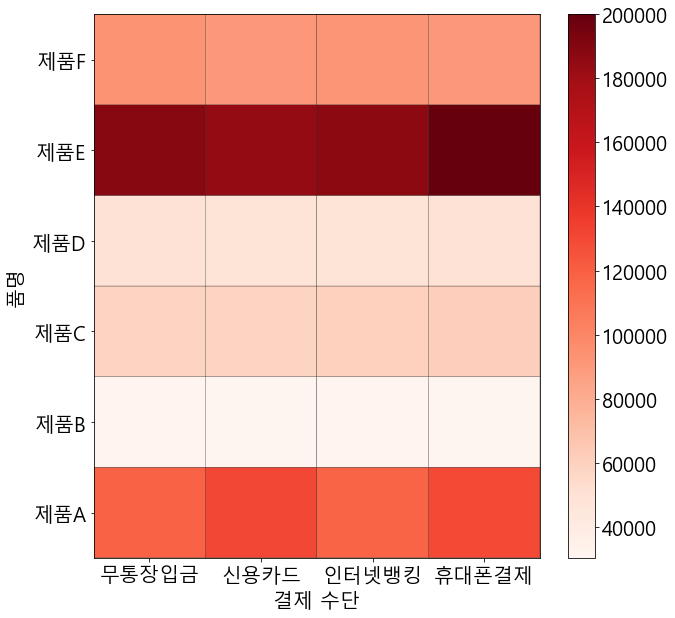

In [51]:
# 결제 수단에 따른 히트맵

plt.rcParams["figure.figsize"] =(10,10)
plt.xlabel('결제 수단')
plt.ylabel('품명')

plt.xticks(np.arange(0.5,len(pivot_df.columns)), pivot_df.columns)
plt.yticks(np.arange(0.5,len(pivot_df.index)), pivot_df.index)


plt.pcolor(pivot_df, edgecolors = 'black', cmap = plt.cm.Reds)
plt.colorbar()


#### Step5. 충성 고객 찾기
- 주문 금액 합과 빈도가 모두 상위 10% 안에 속하는 고객을 찾아 정리. 
- 고객 id 별, 주문 금액 합과 빈도 구하기. 

In [57]:
customer_paid_count = df.groupby(['주문인 ID'], as_index = False)['주문 금액'].agg(['sum', 'count'])
customer_paid_count

,sum,count
주문인 ID,,
C-0,1822700.0,34
C-1,2779700.0,36
C-10,2774200.0,34
C-100,3950100.0,46
C-101,2922700.0,32
...,...,...
C-95,3234000.0,41
C-96,2838000.0,39
C-97,2979900.0,31


In [68]:
loyal_customer = customer_paid_count.sort_values(by = ['sum', 'count'], ascending = False).iloc[:int(len(customer_paid_count)*0.1)]
loyal_customer
# 이 경우는 금액의 합계 데이터가 연속적이기 때문에 'count' 기준이 사용되지 않는다. 때문에 다른 방법을 선택하여야 한다. 
# 합계의 상위 10% 이면서 빈도수가 상위 10%인 경우를 찾아보라. 

,sum,count
주문인 ID,,
C-450,4759700.0,51
C-288,4640900.0,50
C-35,4453900.0,43
C-320,4313100.0,63
C-106,4276800.0,46
C-189,4250400.0,49
C-389,4171200.0,47
C-475,4012800.0,46
C-302,3974300.0,38


In [79]:
measure_1 = customer_paid_count['sum'].quantile(0.9)
measure_2 = customer_paid_count['count'].quantile(0.9)

cond_1 = customer_paid_count['sum'] >= measure_1
cond_2 = customer_paid_count['count'] >= measure_2
print(measure_1,measure_2)

loyal_customer = customer_paid_count.loc[cond_1 & cond_2].sort_values(by  = ['sum', 'count'], ascending = False).head(10)


3506800.0 44.10000000000002


,sum,count
주문인 ID,,
C-450,4759700.0,51
C-288,4640900.0,50
C-320,4313100.0,63
C-106,4276800.0,46
C-189,4250400.0,49
C-389,4171200.0,47
C-475,4012800.0,46
C-439,3972100.0,50
C-100,3950100.0,46


In [104]:
list(loyal_customer.index)

['C-450',
 'C-288',
 'C-35',
 'C-320',
 'C-106',
 'C-189',
 'C-389',
 'C-475',
 'C-302',
 'C-439',
 'C-310',
 'C-100',
 'C-317',
 'C-350',
 'C-31',
 'C-272',
 'C-111',
 'C-6',
 'C-22',
 'C-330',
 'C-54',
 'C-84',
 'C-105',
 'C-489',
 'C-260',
 'C-393',
 'C-256',
 'C-478',
 'C-380',
 'C-135',
 'C-133',
 'C-415',
 'C-448',
 'C-48',
 'C-191',
 'C-434',
 'C-210',
 'C-81',
 'C-497',
 'C-476',
 'C-104',
 'C-351',
 'C-357',
 'C-5',
 'C-33',
 'C-220',
 'C-213',
 'C-433',
 'C-16',
 'C-411']

In [106]:
df.head()

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단,가격,주문 금액,월
0,2018-1-1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹,5000,16500.0,1
1,2018-1-1,지점2,제품F,8,C-87,서울특별시 서대문구 신촌동,배송완료,신용카드,15000,132000.0,1
2,2018-1-1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제,5000,11000.0,1
3,2018-1-1,지점3,제품D,7,C-307,서울특별시 서대문구 냉천동,주문완료,휴대폰결제,8000,61600.0,1
4,2018-1-1,지점2,제품E,9,C-342,서울특별시 종로구 묘동,배송완료,인터넷뱅킹,30000,297000.0,1


In [97]:
df.loc[df['주문인 ID'] == 'C-450']['결제 수단'].value_counts()

인터넷뱅킹    31
신용카드     10
무통장입금     6
휴대폰결제     4
Name: 결제 수단, dtype: int64

In [98]:
df.loc[df['주문인 ID'] == 'C-450']['품명'].value_counts()

제품D    13
제품F    11
제품C     9
제품B     7
제품E     6
제품A     5
Name: 품명, dtype: int64

In [96]:
df.loc[df['주문인 ID'] == 'C-450']['결제 수단'].value_counts()

인터넷뱅킹    31
신용카드     10
무통장입금     6
휴대폰결제     4
Name: 결제 수단, dtype: int64